In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


In [3]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 


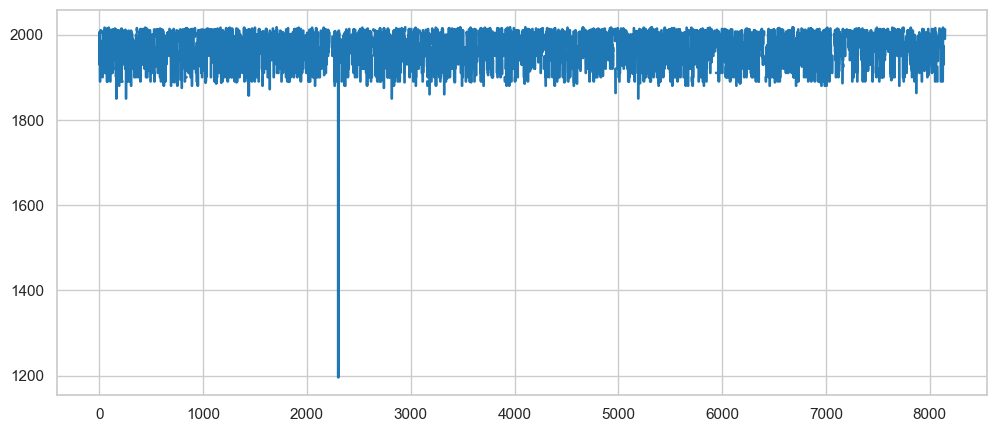

In [4]:
plt.plot(test_set.index, test_set['YearBuilt'])

In [5]:
for column_name in test_set.columns:
    column = test_set[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)
    

Count of zeros in column  Suburb  is :  0
Count of zeros in column  Address  is :  0
Count of zeros in column  Rooms  is :  0
Count of zeros in column  Type  is :  0
Count of zeros in column  Method  is :  0
Count of zeros in column  SellerG  is :  0
Count of zeros in column  Date  is :  0
Count of zeros in column  Distance  is :  4
Count of zeros in column  Postcode  is :  0
Count of zeros in column  Bedroom2  is :  6
Count of zeros in column  Bathroom  is :  17
Count of zeros in column  Car  is :  626
Count of zeros in column  Landsize  is :  1193
Count of zeros in column  BuildingArea  is :  9
Count of zeros in column  YearBuilt  is :  0
Count of zeros in column  CouncilArea  is :  0
Count of zeros in column  Lattitude  is :  0
Count of zeros in column  Longtitude  is :  0
Count of zeros in column  Regionname  is :  0
Count of zeros in column  Propertycount  is :  0


In [6]:
train_set.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                25
Landsize            0
BuildingArea     2542
YearBuilt        2130
CouncilArea       553
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

# The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features



In [7]:
# print the dataset size
print("There are", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There are 5432 samples
Each sample has 21 features


In [8]:
# print the top elements from the dataset

train_set.head()



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [9]:
test_set.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,NaN,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.0,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.0,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.0,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,NaN,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


In [10]:
check_address = test_set.groupby(['Address']).size().to_frame('num').reset_index()
check_address[check_address.num > 2]

,Address,num
132,1/1 Clarendon St,3
1400,13 Robinson St,3
3809,28 Blair St,3
4795,36 Aberfeldie St,3


In [11]:
print(train_set['YearBuilt'].isnull().values.ravel().sum())

print(train_set['YearBuilt'].value_counts().sort_index())





2130
1830.0     1
1854.0     1
1856.0     1
1860.0     1
1862.0     1
          ..
2014.0    46
2015.0    24
2016.0    23
2017.0     9
2018.0     1
Name: YearBuilt, Length: 121, dtype: int64


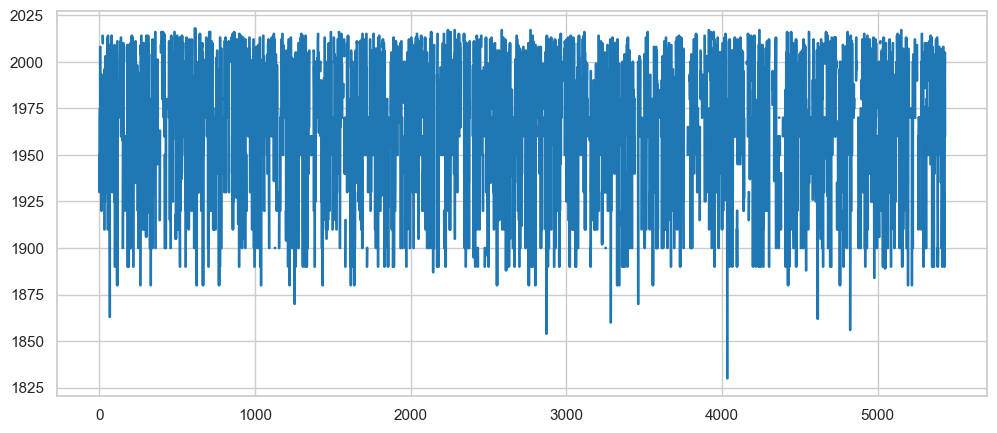

In [12]:
plt.plot(train_set.index, train_set['YearBuilt'])

Suburb 292 304
Address 5399 8073
Rooms 8 9
Type 3 3
Method 5 5
SellerG 203 230
Date 58 57
Distance 194 195
Postcode 187 192
Bedroom2 10 11
Bathroom 9 9
Car 10 10
Landsize 1131 1239
BuildingArea 435 483
YearBuilt 121 131
CouncilArea 32 32
Lattitude 3567 4640
Longtitude 3790 4968
Regionname 8 8
Propertycount 289 301


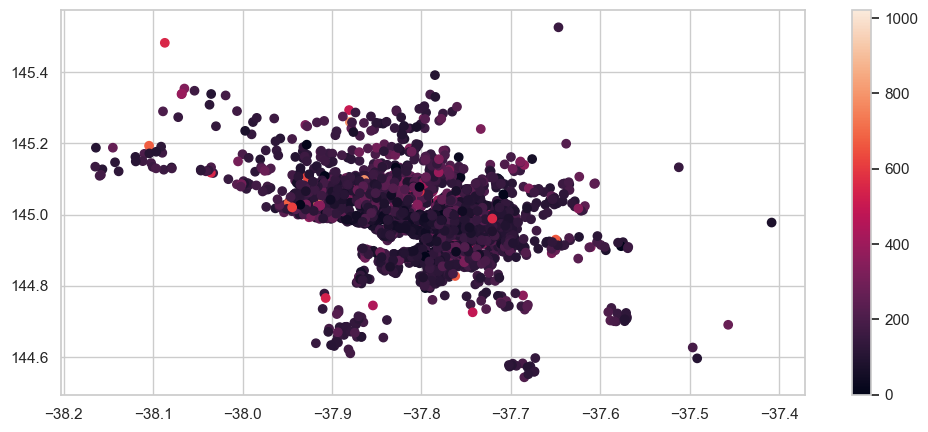

In [13]:
train_set2 = train_set[train_set.Bedroom2 <= 19]

train_set2 = train_set2.drop('Price', axis = 1)

for i in train_set2.columns:
    print(i, train_set2[i].nunique(), test_set[i].nunique())
    
plt.scatter(train_set[train_set['BuildingArea'] < 1500]['Lattitude'], train_set[train_set['BuildingArea'] < 1500]['Longtitude'], c=train_set[train_set['BuildingArea'] < 1500]['BuildingArea'])
plt.colorbar()





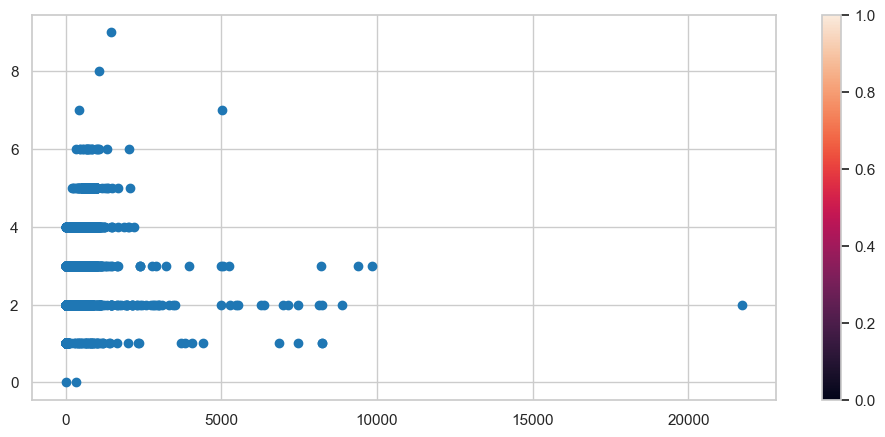

In [14]:

    
plt.scatter(test_set[test_set['BuildingArea']<100000]['Landsize'], test_set[test_set['BuildingArea']<100000]['Bedroom2'])
plt.colorbar()


(-100.0, 1000.0)

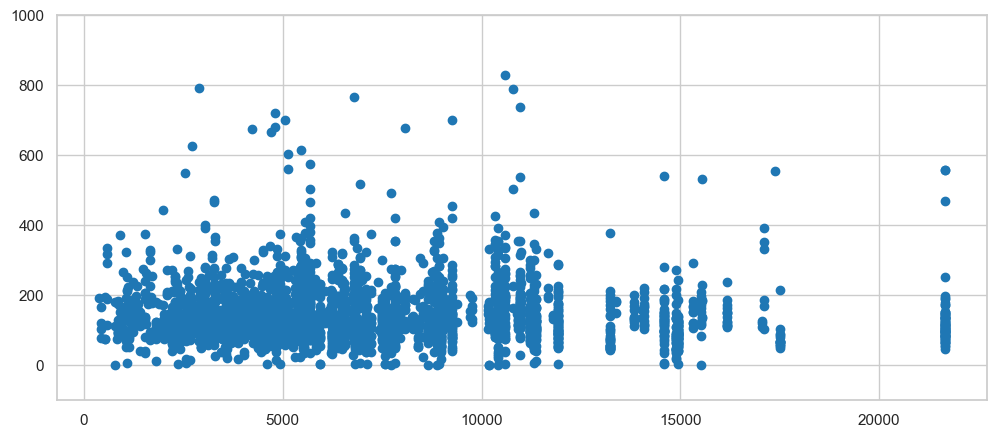

In [15]:
plt.scatter(train_set['Propertycount'], train_set['BuildingArea'])
plt.ylim(-100, 1000)

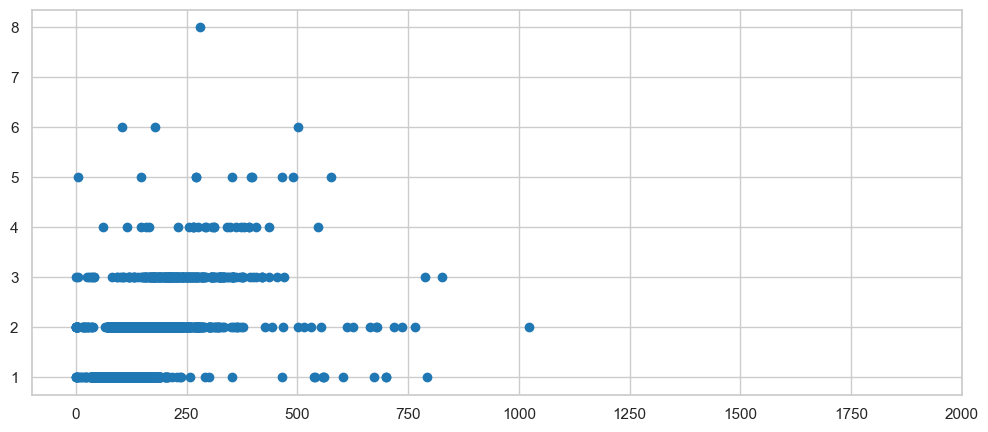

In [16]:
plt.scatter(train_set['BuildingArea'], train_set['Bathroom'])

plt.xlim(-100,2000)
# plt.ylim(-1,1000)

plt.show()


(0.0, 500.0)

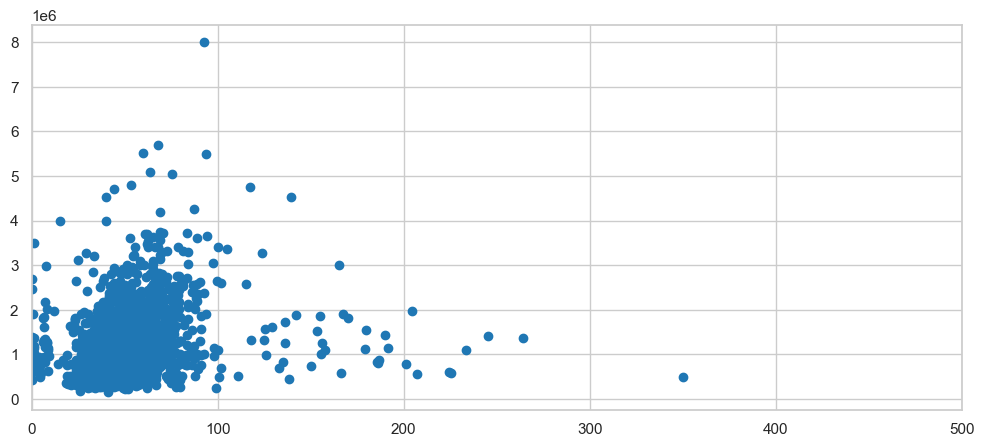

In [17]:
plt.scatter(train_set['BuildingArea']/train_set['Rooms'], train_set['Price'])
plt.xlim(0,500)

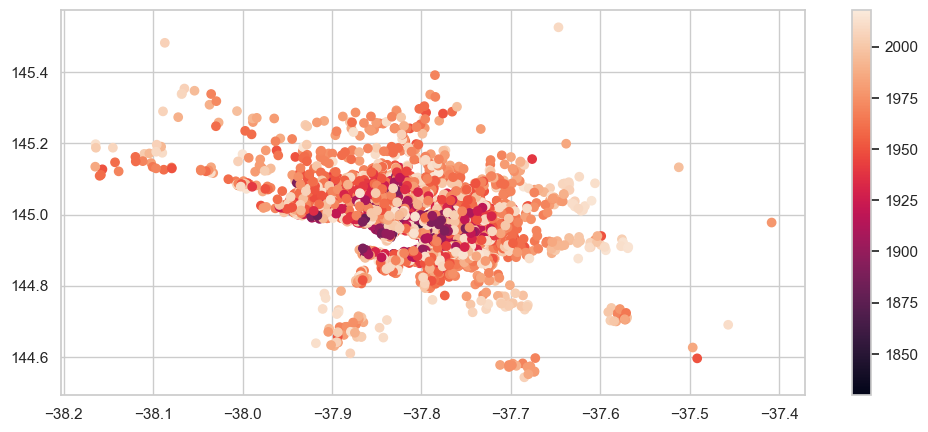

In [18]:
plt.scatter(train_set['Lattitude'], train_set['Longtitude'], c=train_set['YearBuilt'])
plt.colorbar()

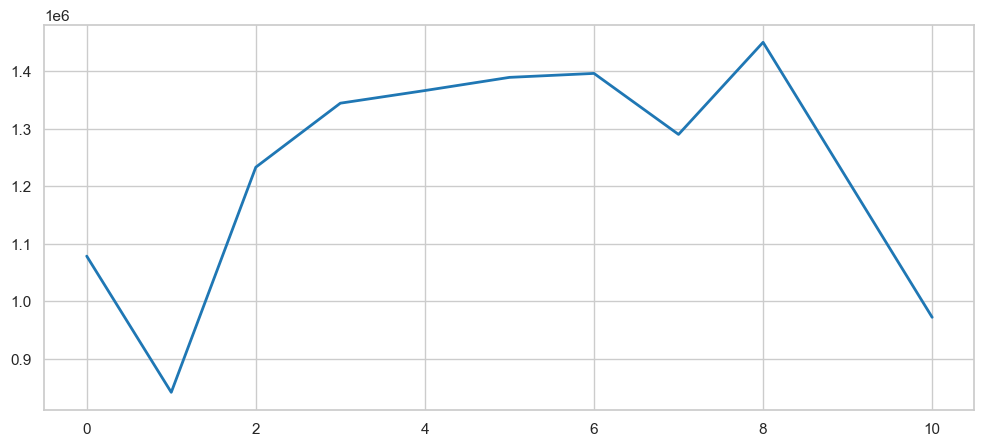

In [19]:
room_avg_price = train_set.groupby('Car').mean().Price.reset_index()

plt.plot(room_avg_price.Car, room_avg_price.Price)

In [20]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 

mse with knn( 30 ): 47389.613610140936 -0.06799541171855905


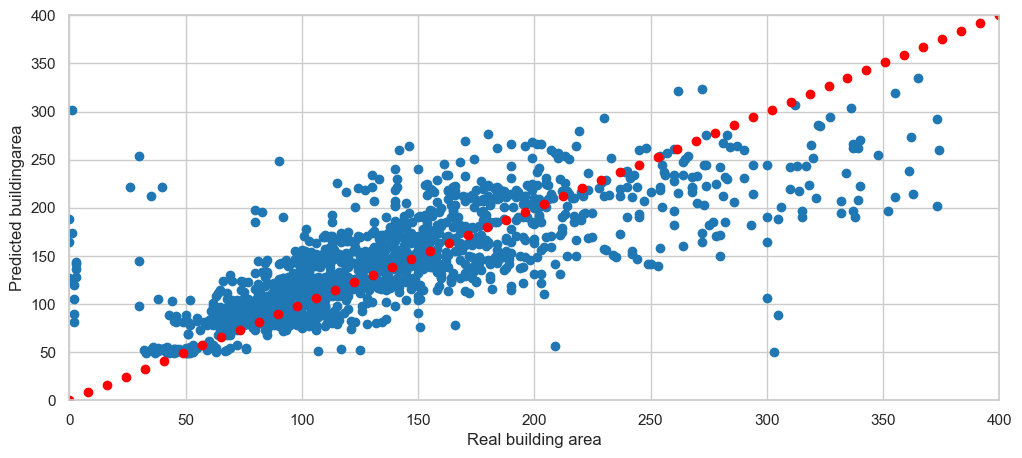

In [21]:
# It looks like BuildingArea affects price quite a lot, but there are many rows with NaN values for this parameter --> We will use a predictor for this parameter to input values to missing data
# according to the location of the house and the number of bathrooms and bedrooms it has
# Since this does not depend on price, we will train the predictor using al non-nan rows of both the train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set.drop('Price', inplace=False, axis = 1), test_set])

building_train = predictor_set[predictor_set['BuildingArea'].isna() == False]

param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

bdata_train, bdata_val, blabel_train, blabel_val = \
    train_test_split(building_train[param_list], building_train['BuildingArea'], test_size=0.2, random_state=6)


n_neighbors = 30
knn = KNeighborsRegressor(n_neighbors)

knn.fit(bdata_train, blabel_train)

prediction = knn.predict(bdata_val)

print('mse with knn(', n_neighbors,'):', mean_squared_error(blabel_val, prediction), r2_score(blabel_val, prediction))

plt.scatter(blabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')
plt.xlim(0,400)
plt.ylim(0,400)

plt.xlabel('Real building area')
plt.ylabel('Predicted buildingarea')

plt.show()



# The linear model works pretty bad in this case, so we are gonna stick with the k neighbors model


# lr = LinearRegression()

# lr.fit(bdata_train, blabel_train)

# prediction = lr.predict(bdata_val)

# print('mse with lr:', mean_squared_error(blabel_val, prediction), r2_score(blabel_val, prediction))



mse with random forest 44301.32076094693 0.001603859972413857


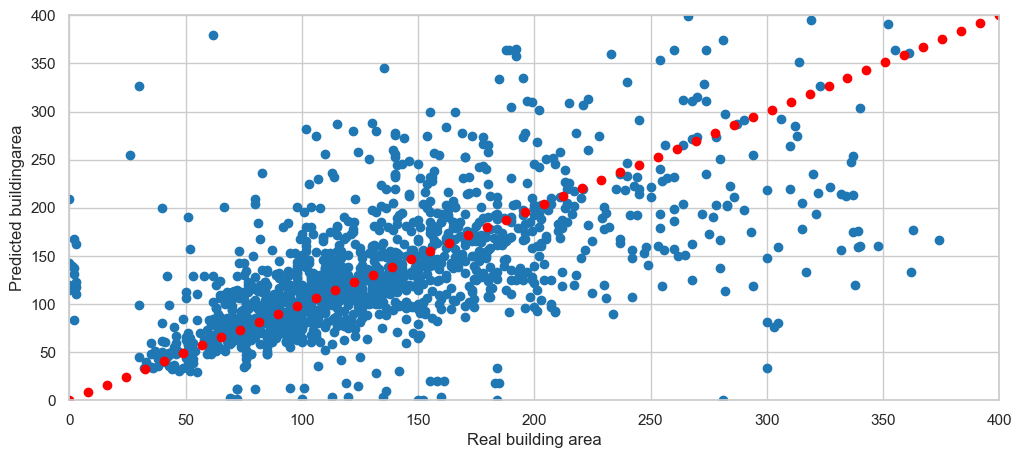

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


predictor_set = pd.concat([train_set.drop('Price', inplace=False, axis = 1), test_set])

building_train = predictor_set[predictor_set['BuildingArea'].isna() == False]

param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

bdata_train, bdata_val, blabel_train, blabel_val = \
    train_test_split(building_train[param_list], building_train['BuildingArea'], test_size=0.2, random_state=6)


forest_reg = DecisionTreeRegressor(random_state=42)

forest_reg.fit(bdata_train, blabel_train)

prediction = forest_reg.predict(bdata_val)

print('mse with random forest', mean_squared_error(blabel_val, prediction), r2_score(blabel_val, prediction))

plt.scatter(blabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')
plt.xlim(0,400)
plt.ylim(0,400)

plt.xlabel('Real building area')
plt.ylabel('Predicted buildingarea')

plt.show()



In [22]:

predictor_set = pd.concat([train_set.drop('Price', inplace=False, axis = 1), test_set])

building_train = predictor_set[predictor_set['BuildingArea'].isna() == False]



param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

n_neighbors = 30
buildingarea_predictor = KNeighborsRegressor(n_neighbors)

buildingarea_predictor.fit(building_train[param_list], building_train['BuildingArea'])

KNeighborsRegressor(n_neighbors=30)

In [23]:
train_ba_na = train_set[train_set['BuildingArea'].isna()]
train_ba_not_na = train_set[train_set['BuildingArea'].isna() == False]


predictedna = buildingarea_predictor.predict(train_ba_na[param_list])

train_ba_na['BuildingArea'] = predictedna

train_set_ba_pred = pd.concat([train_ba_na, train_ba_not_na]).sort_index()


test_ba_na = test_set[test_set['BuildingArea'].isna()]
test_ba_not_na = test_set[test_set['BuildingArea'].isna() == False]


predictedna = buildingarea_predictor.predict(test_ba_na[param_list])

test_ba_na['BuildingArea'] = predictedna

test_set_ba_pred = pd.concat([test_ba_na, test_ba_not_na]).sort_index()


C:\Users\ptbad\AppData\Local\Temp\ipykernel_6200\1124346006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ba_na['BuildingArea'] = predictedna
C:\Users\ptbad\AppData\Local\Temp\ipykernel_6200\1124346006.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ba_na['BuildingArea'] = predictedna


In [24]:
train_set_ba_pred.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,189.800000,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,94.533333,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.000000,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,147.593333,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.000000,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [25]:
test_set_ba_pred.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,162.233333,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.000000,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.000000,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.000000,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,91.943333,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


mse with knn( 50 ): 1092.7602312475021 0.17529097027691087


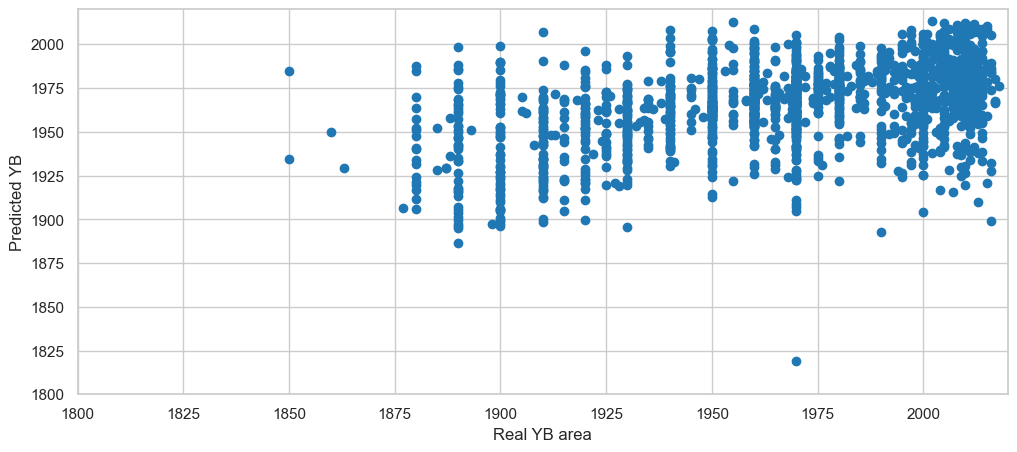

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set_ba_pred.drop('Price', inplace=False, axis = 1), test_set_ba_pred])

yearbuilt_train = predictor_set[(predictor_set['YearBuilt'].isna() == False) & (predictor_set['YearBuilt']<2020)]

param_list = ['Lattitude', 'Longtitude', 'Distance']

ybdata_train, ybdata_val, yblabel_train, yblabel_val = \
    train_test_split(yearbuilt_train[param_list], yearbuilt_train['YearBuilt'], test_size=0.2, random_state=6)



knn = RandomForestRegressor(n_estimators=20, random_state=42)

knn.fit(ybdata_train, yblabel_train)

prediction = knn.predict(ybdata_val)

print('mse with knn(', n_neighbors,'):', mean_squared_error(yblabel_val, prediction), r2_score(yblabel_val, prediction))

plt.scatter(yblabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')


plt.xlabel('Real YB area')
plt.ylabel('Predicted YB')

plt.xlim(1800,2020)
plt.ylim(1800,2020)

plt.show()



mse with lr: 1237.8521599345447 0.06578970887802238


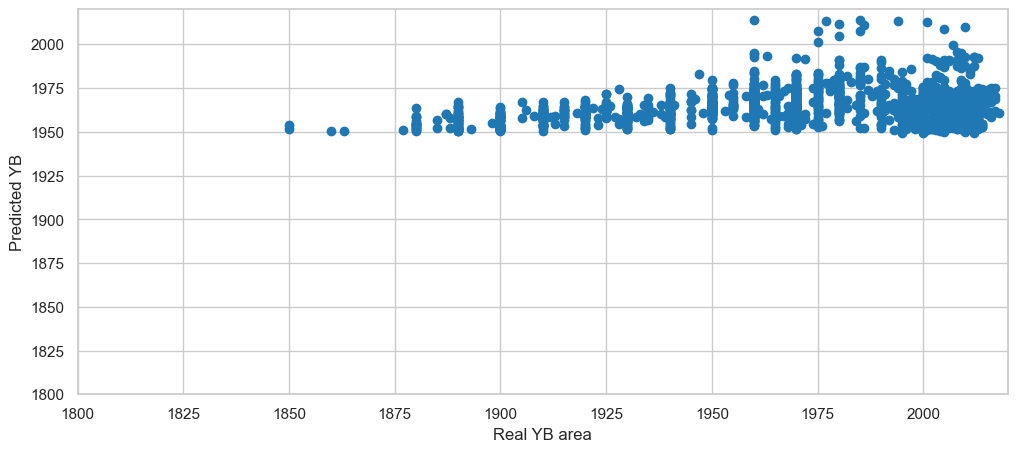

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set_ba_pred.drop('Price', inplace=False, axis = 1), test_set_ba_pred])

yearbuilt_train = predictor_set[(predictor_set['YearBuilt'].isna() == False) & (predictor_set['YearBuilt']<2020)]

param_list = ['Lattitude', 'Longtitude', 'Distance']

ybdata_train, ybdata_val, yblabel_train, yblabel_val = \
    train_test_split(yearbuilt_train[param_list], yearbuilt_train['YearBuilt'], test_size=0.2, random_state=6)


lr = LinearRegression()

lr.fit(ybdata_train, yblabel_train)

prediction = lr.predict(ybdata_val)

print('mse with lr:', mean_squared_error(yblabel_val, prediction), r2_score(yblabel_val, prediction))

plt.scatter(yblabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')


plt.xlabel('Real YB area')
plt.ylabel('Predicted YB')

plt.xlim(1800,2020)
plt.ylim(1800,2020)

plt.show()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,189.800000,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,94.533333,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.000000,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,147.593333,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.000000,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,0.0,148.433333,1930.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.000000,1890.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,111.566667,1993.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0


In [30]:
test_set_ba_pred

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,162.233333,NaN,Bayside,-37.9287,144.99200,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.000000,2002.0,Melbourne,-37.8091,144.95200,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.000000,1930.0,Port Phillip,-37.8718,144.97670,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.000000,2006.0,Moreland,-37.7152,144.93460,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,91.943333,1970.0,Hobsons Bay,-37.8331,144.87150,Western Metropolitan,984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,Moonee Ponds,36 Primrose St,3,h,S,McDonald,10/12/2016,6.9,3039.0,3.0,1.0,1.0,395.0,116.958667,NaN,Moonee Valley,-37.7593,144.92760,Western Metropolitan,6232.0
8144,Sunshine West,9 Dalpura Dr,3,h,S,Barry,3/12/2016,13.5,3020.0,3.0,1.0,2.0,538.0,126.600000,NaN,Brimbank,-37.7952,144.81260,Western Metropolitan,6763.0
8145,Coburg,22/129 Harding St,3,t,S,Barry,13/05/2017,7.8,3058.0,3.0,1.0,2.0,120.0,113.760000,1990.0,Moreland,-37.7462,144.97950,Northern Metropolitan,11204.0


mse with knn( 30 ): 0.7829672329573472 0.1324938119595691


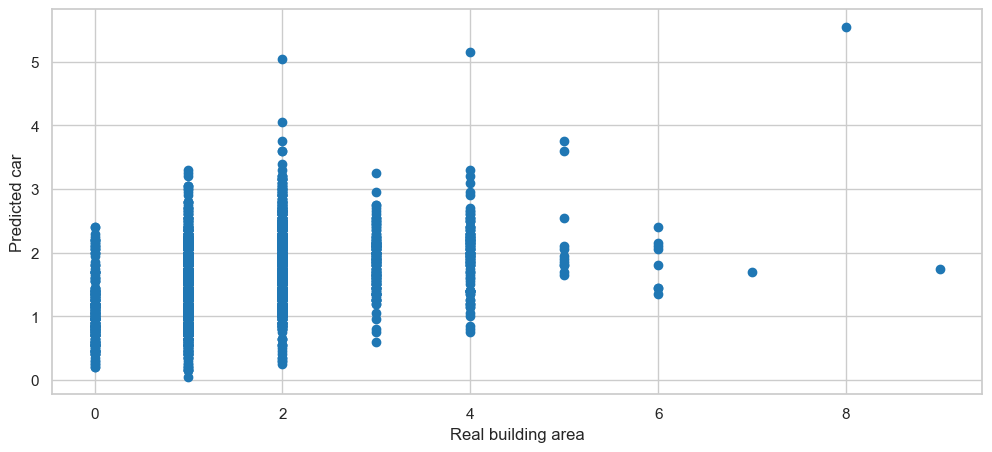

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set_ba_pred.drop('Price', inplace=False, axis = 1), test_set_ba_pred])



car_train = predictor_set[predictor_set['Car'].isna() == False]

param_list = ['BuildingArea', 'Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

ldata_train, ldata_val, llabel_train, llabel_val = \
    train_test_split(car_train[param_list], car_train['Car'], test_size=0.2, random_state=6)


n_neighbors = 30
knn = RandomForestRegressor(n_estimators=20, random_state=42)

knn.fit(ldata_train, llabel_train)

prediction = knn.predict(ldata_val)

print('mse with knn(', n_neighbors,'):', mean_squared_error(llabel_val, prediction), r2_score(llabel_val, prediction))

plt.scatter(llabel_val, prediction)



plt.xlabel('Real building area')
plt.ylabel('Predicted car')


plt.show()

#For the l attribute is way better to fill in 

(0.0, 1000.0)

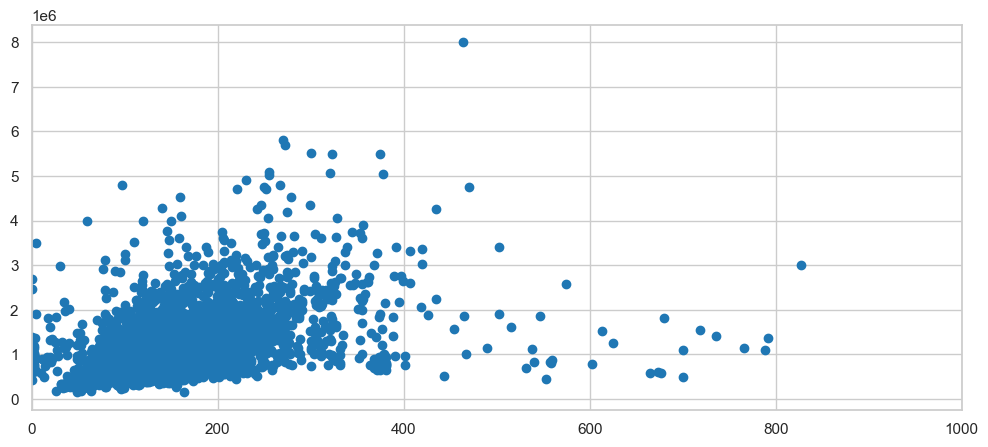

In [32]:
plt.scatter(train_set_ba_pred['BuildingArea'], train_set_ba_pred['Price'])

plt.xlim(0,1000)

In [33]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [34]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [35]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

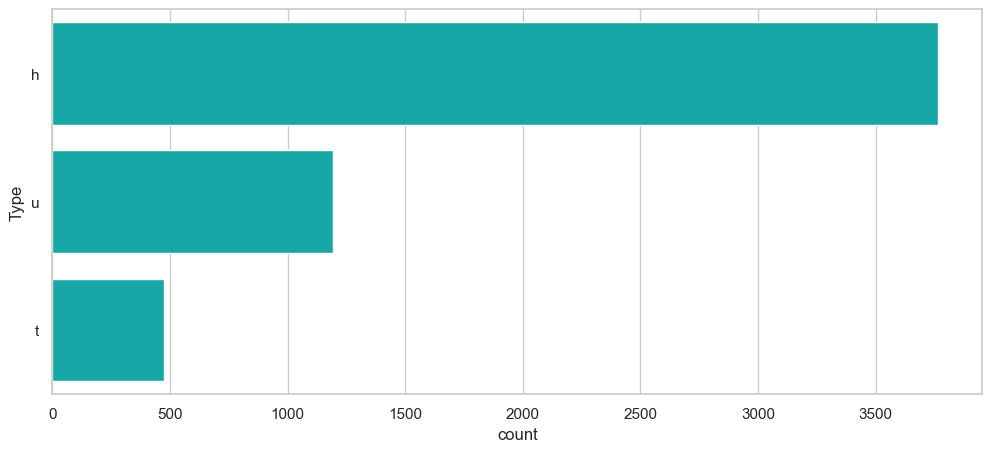

In [36]:
sns.countplot(y="Type", data=train_set, color="c")


It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html

Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased) Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

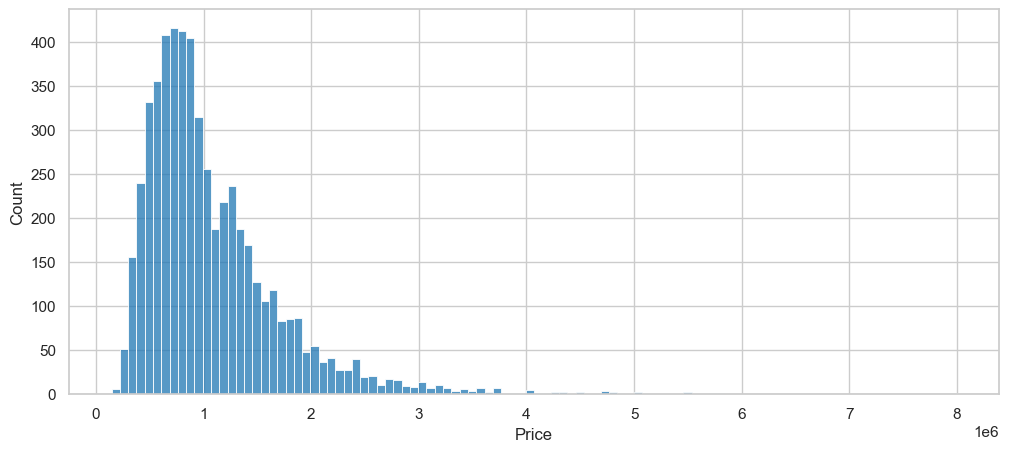

In [37]:
sns.histplot(train_set["Price"])
plt.show()

In [38]:
# Anderson code begin

import datetime
format_str = '%d/%m/%Y' # The format
train_set["Year"]=[datetime.datetime.strptime(d, format_str).date().year for d in train_set.Date]
train_set["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in train_set.Date]
train_set["YearMonth"]=[str(y)+ "-" + str(m).zfill(2) for y,m in zip(train_set.Year,train_set.Month)]
train_set["YearMonth"]

index
0       2017-08
1       2017-05
2       2016-10
3       2016-05
4       2016-08
         ...   
5427    2016-08
5428    2017-08
5429    2016-08
5430    2016-04
5431    2016-07
Name: YearMonth, Length: 5432, dtype: object

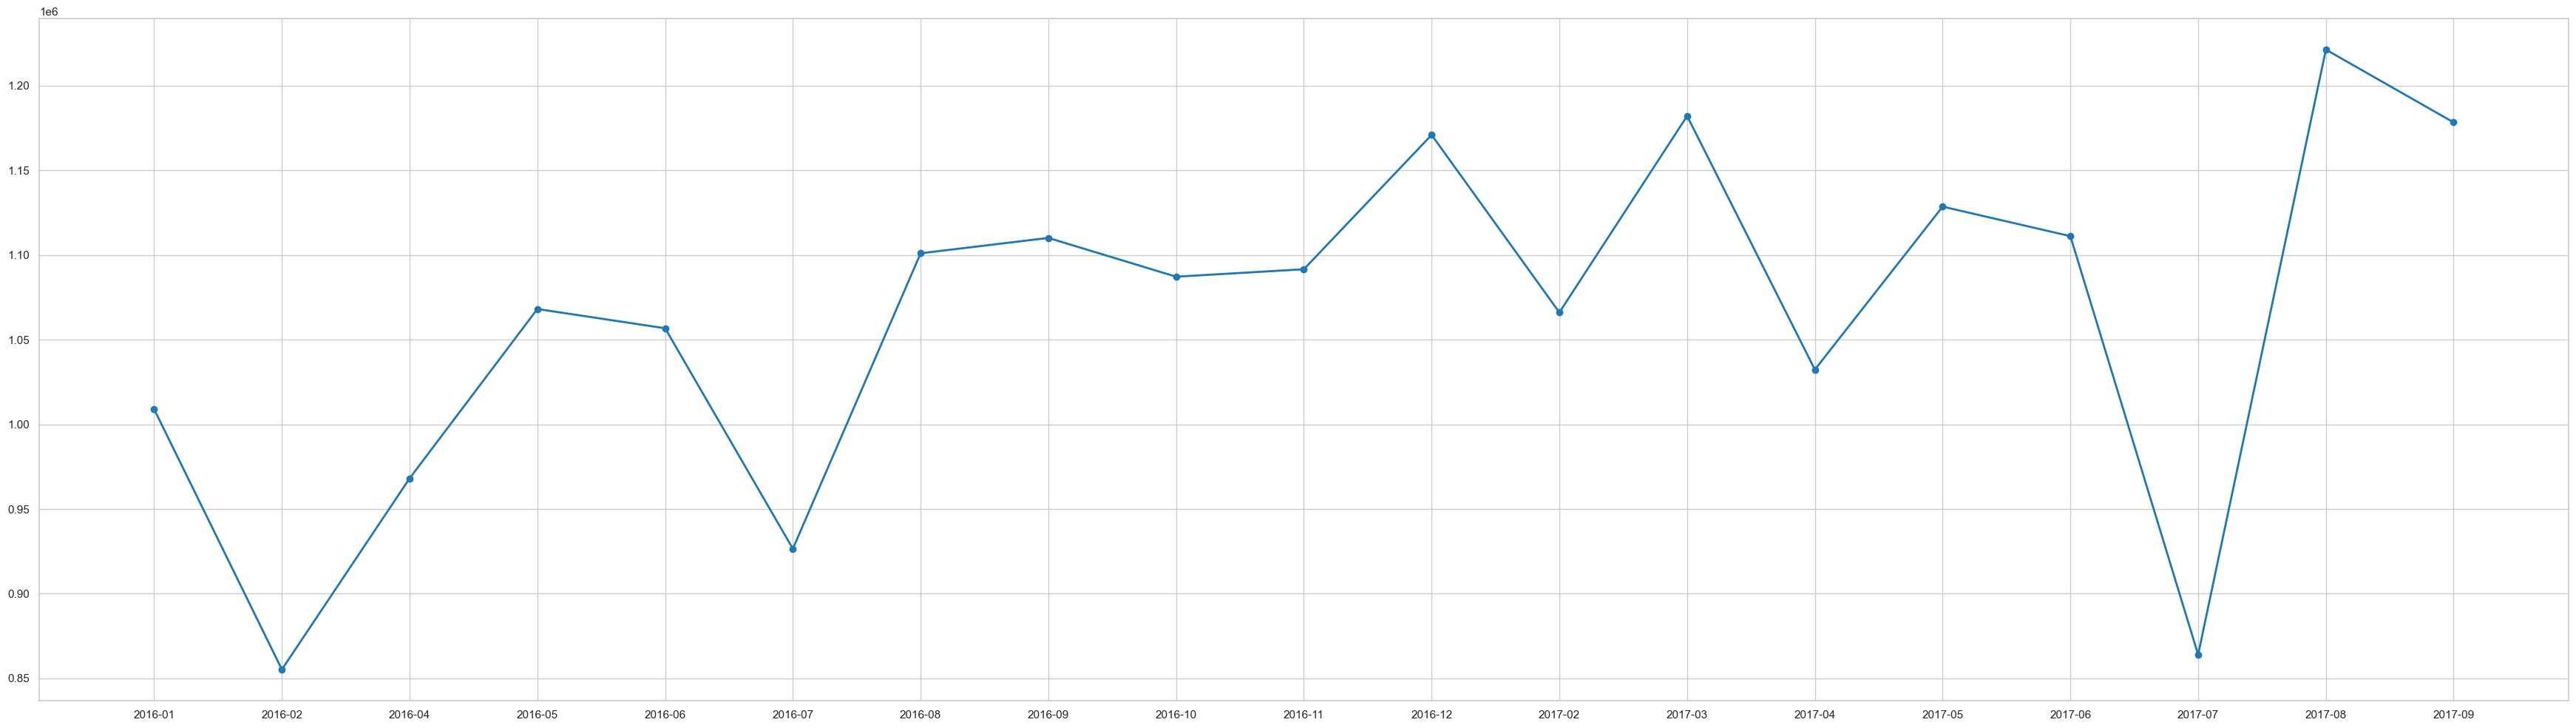

In [39]:
fig = plt.figure(figsize=(35,10))
df = train_set
values= df.groupby(df.YearMonth)["Price"].mean()
plt.plot(values,marker="o")


fig.tight_layout()

In [40]:
seed = 1
columns_train=["Rooms","Distance","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"]
# columns_train=["NB"]
train_data = train_set[columns_train].fillna(0)

dt = [train_data.apply(lambda x: [x.Rooms,x.Distance,x.Bedroom2,x.Bathroom,x.Car,x.Landsize,x.BuildingArea,x.YearBuilt,x.Lattitude,x.Longtitude,x.Propertycount], axis=1)]
# dt = [train_data.apply(lambda x: [x.NB], axis=1)]
target = np.array(train_set.Price) #target
data_matrix = []
for data in dt[0]:
    data_array=np.array(data)
    data_matrix.append(data_array)

data_matrix= np.array(data_matrix)

In [41]:
X,y = data_matrix, target # Create X matrix and y vector from the dataset.
features = columns_train
print('feature names: {}'.format(columns_train))
print('Shape of data: {} {}'.format(X.shape, y.shape))

feature names: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Shape of data: (5432, 11) (5432,)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (4345, 11) (1087, 11)
Train and test sizes of y: (4345,) (1087,)


In [43]:
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting


# Regrerssion coefs
coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()

# Prediction
y_test_pred = lr.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2score = lr.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score))


Intercept and coefs:
-196623917.31569704 [ 3.00808187e+05 -4.47595987e+04  5.46877266e+03  1.76321166e+05
  5.97956773e+04  1.41970428e+01  3.56206841e+01 -3.82653435e+01
 -1.57645807e+06  9.47157722e+05 -1.68432183e+00]

MSE: 217103362155.22702
R^2 Score: 0.47105176624284584


<AxesSubplot:title={'center':'Model Coefficients'}>

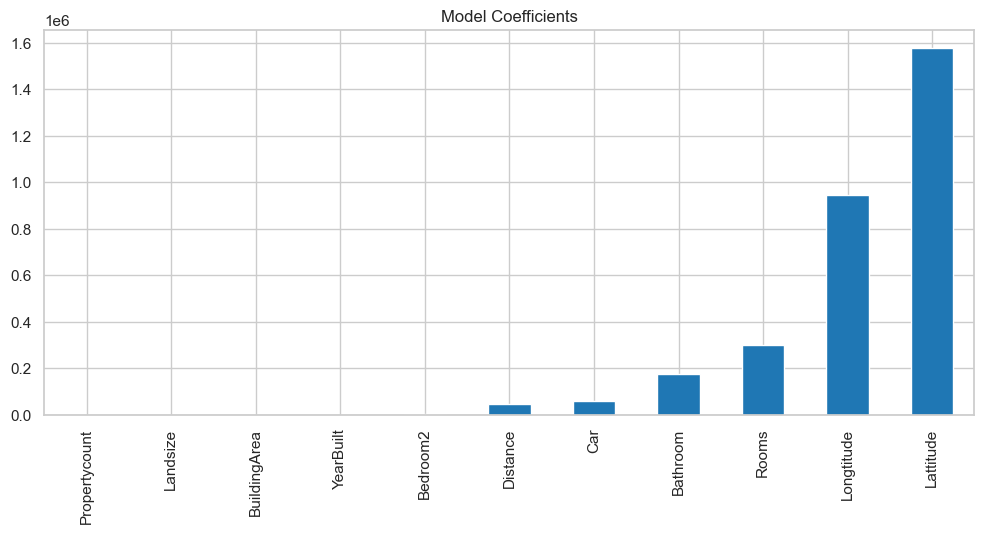

In [44]:
coefs_lr.plot(kind='bar', title='Model Coefficients')

# Anderson code end

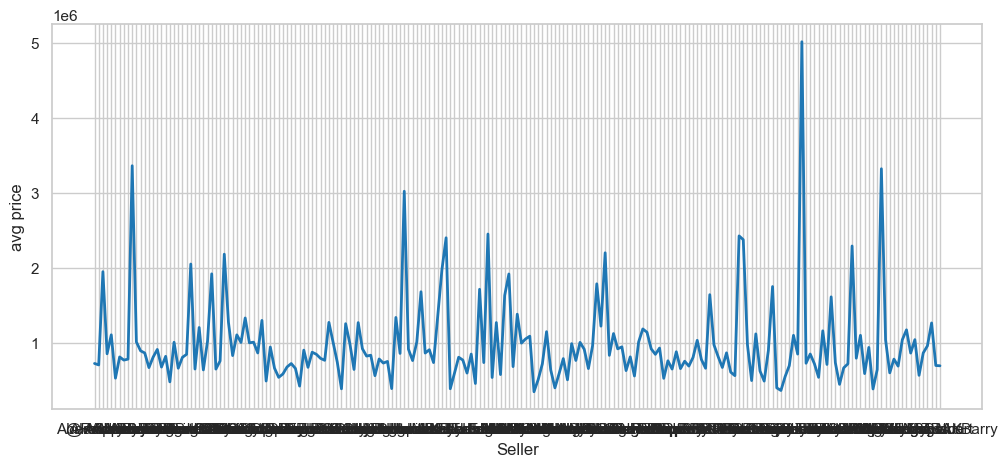

In [45]:
seller_mean_price = train_set.groupby('SellerG').mean().Price.reset_index()

seller_mean_price.columns = ['SellerG', 'SellerAvgPrice']

plt.ylabel('avg price')
plt.xlabel("Seller")
plt.plot(seller_mean_price['SellerG'], seller_mean_price['SellerAvgPrice'])



Text(0, 0.5, 'Avg Price')

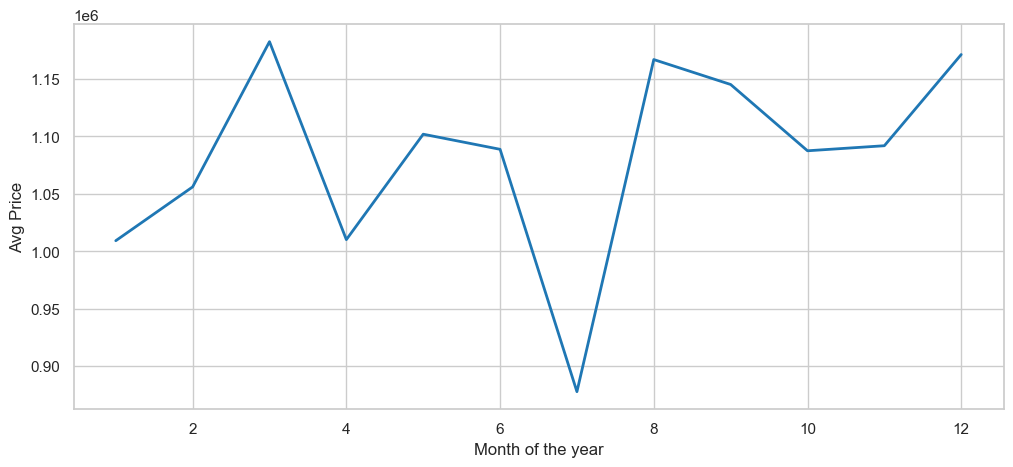

In [46]:
month_mean_price = train_set.groupby('Month').mean().Price.reset_index()

month_mean_price.columns = ['Month', 'MonthAvgPrice']

plt.plot(month_mean_price.Month, month_mean_price.MonthAvgPrice)

plt.xlabel("Month of the year")
plt.ylabel("Avg Price")

Text(0, 0.5, 'Avg Price')

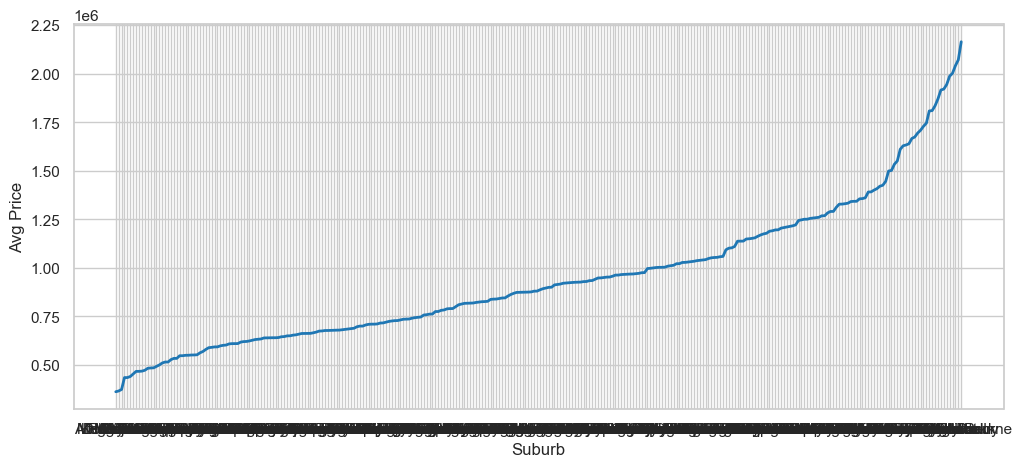

In [47]:
suburb_mean_price = train_set.groupby('Suburb').mean().Price.reset_index()

suburb_mean_price.columns = ['Suburb', 'SuburbAvgPrice']

suburb_mean_price = suburb_mean_price.sort_values(by = 'SuburbAvgPrice')

plt.plot(suburb_mean_price.Suburb, suburb_mean_price.SuburbAvgPrice)
plt.xlabel("Suburb")
plt.ylabel("Avg Price")



# Prediction part


In [48]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 

test_set.shape

(8148, 20)

In [49]:



train_set["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in train_set.Date] 

test_set["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in test_set.Date] 


In [50]:
train_set.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
index,,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,8
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,5
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,10
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,5
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,8


In [51]:
train_set2 = train_set
test_set2 = test_set

print(test_set.shape)


def data_processing(df):

    
#drop columns which we won't be using

    df.drop('Address', axis=1, inplace=True)
    df.drop('Postcode', axis=1, inplace=True)
    
    
#these two ones are preliminary
    
    df.drop('BuildingArea', axis=1, inplace=True)
    df.drop('YearBuilt', axis=1, inplace=True)
    df.drop('Date', axis=1, inplace=True)

    
    
#Target encoding cathegorical variables using mean price 

    suburb_mean_price = train_set2.groupby('Suburb').mean().Price.reset_index()
    suburb_mean_price.columns = ['Suburb', 'SuburbAvgPrice']

    df = pd.merge(df, suburb_mean_price, on = 'Suburb')
    df.drop('Suburb', axis=1, inplace=True)


    seller_mean_price = train_set2.groupby('SellerG').mean().Price.reset_index()
    seller_mean_price.columns = ['SellerG', 'SellerAvgPrice']

    df = pd.merge(df, seller_mean_price, on = 'SellerG')
    df.drop('SellerG', axis=1, inplace=True)


    councilarea_mean_price = train_set2.groupby('CouncilArea').mean().Price.reset_index()
    councilarea_mean_price.columns = ['CouncilArea', 'CouncilAreaAvgPrice']

    df = pd.merge(df, councilarea_mean_price, on = 'CouncilArea')
    df.drop('CouncilArea', axis=1, inplace=True)
    
    
    region_mean_price = train_set2.groupby('Regionname').mean().Price.reset_index()
    region_mean_price.columns = ['Regionname', 'RegionMeanPrice']

    df = pd.merge(df, region_mean_price, on = 'Regionname')
    df.drop('Regionname', axis=1, inplace=True)


    month_mean_price = train_set2.groupby('Month').mean().Price.reset_index()
    month_mean_price.columns = ['Month', 'MonthAvgPrice']

    df = pd.merge(df, month_mean_price, on = 'Month')
    df.drop('Month', axis=1, inplace=True)


#One hot encoding vor variables with very few possible values

    # dummies = pd.get_dummies(df['Method'])

    # df = pd.concat([df, dummies], axis=1).reindex(df.index)

    # df.drop('Method', axis=1, inplace=True)
    # df.drop('VB', axis = 1, inplace= True)


    # dummies = pd.get_dummies(df['Type'])

    # df = pd.concat([df, dummies], axis=1).reindex(df.index)

    # df.drop('Type', axis=1, inplace=True)
    
    # df.drop('h', axis = 1, inplace= True)

 
    
    return df


def fillna(df):

    df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)


 

    

(8148, 21)


In [52]:

processed_train_set = data_processing(train_set)
processed_test_set = data_processing(test_set)

print(processed_test_set.shape)

processed_train_set = processed_train_set.fillna(0)
processed_test_set = processed_test_set.fillna(0)

(7222, 16)


In [53]:
train_set2.head()


,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
index,,,,,,,,,,,,,,,,,
0,Aberfeldie,4,h,1380000.0,VB,Nelson,7.5,4.0,2.0,2.0,766.0,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,8
1,Northcote,2,h,1100000.0,SP,Jellis,5.5,2.0,1.0,1.0,189.0,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,5
2,Balwyn North,3,h,1480000.0,PI,Jellis,9.2,3.0,1.0,4.0,605.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,10
3,Brunswick,3,h,1055000.0,S,Nelson,5.2,3.0,1.0,1.0,324.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,5
4,Templestowe Lower,4,h,1000000.0,VB,hockingstuart,13.8,4.0,3.0,2.0,728.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,8


In [54]:
processed_test_set.head()

,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,SuburbAvgPrice,SellerAvgPrice,CouncilAreaAvgPrice,RegionMeanPrice,MonthAvgPrice
0,3,h,S,11.2,3.0,2.0,3.0,588.0,-37.92870,144.99200,10579.0,2.001381e+06,1.204294e+06,1.661414e+06,1.387019e+06,1.166611e+06
1,4,h,PI,10.5,4.0,4.0,4.0,508.0,-37.90904,144.99868,10579.0,2.001381e+06,1.204294e+06,1.661414e+06,1.387019e+06,1.166611e+06
2,3,h,SP,10.3,3.0,1.0,2.0,605.0,-37.93063,145.01314,6938.0,1.498150e+06,1.204294e+06,1.661414e+06,1.387019e+06,1.166611e+06
3,5,h,S,10.7,5.0,2.0,0.0,645.0,-37.91750,145.01160,6938.0,1.498150e+06,1.204294e+06,1.661414e+06,1.387019e+06,1.166611e+06
4,5,h,S,13.7,5.0,4.0,2.0,661.0,-37.94380,145.01840,5454.0,1.638298e+06,1.204294e+06,1.661414e+06,1.387019e+06,1.166611e+06


In [55]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler()

scaled_processed_train_set = scalerX.fit_transform(processed_train_set.loc[:, processed_train_set.columns != 'Price'])


data_train, data_val, label_train, label_val = \
    train_test_split(scaled_processed_train_set, processed_train_set["Price"], test_size=0.2, random_state=6)






ValueError: could not convert string to float: 'h'

In [56]:


# KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(data_train) # Create the transformer StandardScaler and perform the fitting for the training data


data_train_norm = scalerX.transform(data_train)
data_val_norm = scalerX.transform(data_val)



lr = LinearRegression()

## fit the model
lr.fit(data_train_norm, label_train)


## predict training set
y_pred = lr.predict(data_val_norm)



coefs_lr = pd.Series(np.abs(lr.coef_), processed_train_set.loc[:, processed_train_set.columns != 'Price'].columns).sort_values()
coefs_lr.plot(kind='bar', title='Model Coefficients')


## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(label_val, y_pred)))
print("R^2: ",r2_score(label_val, y_pred))


plt.scatter(label_val, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price')
plt.ylim(0, 10000000)
plt.show()



NameError: name 'data_train' is not defined

In [57]:

# KNeighborsRegressor
from sklearn import neighbors

mean_sq_err = 2000000


for i in range(2,20):
    
    n_neighbors = i # you can modify this paramenter (ONLY THIS ONE!!!) #Anderson
    model = neighbors.KNeighborsRegressor(n_neighbors)

    ## fit the model
    model.fit(data_train, label_train)

    ## predict training set
    y_pred = model.predict(data_val)

    ## Evaluate the model and plot it
    from sklearn.metrics import mean_squared_error, r2_score
    

    if (np.sqrt(mean_squared_error(label_val, y_pred))<mean_sq_err):
        mean_sq_err = np.sqrt(mean_squared_error(label_val, y_pred))
        r2 = r2_score(label_val, y_pred)
        best_results = y_pred
        best_i = i

print("RMSE",mean_sq_err)
print("R^2: ",r2)
print("best number of neighbours: ", i)


plt.scatter(label_val, best_results)
plt.xlabel('Price')
plt.ylabel('Predicted price')
plt.show()



NameError: name 'data_train' is not defined

In [58]:


# KNeighborsRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## fit the model
lr.fit(data_train, label_train)


## predict training set
y_pred = lr.predict(data_val)


## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(label_val, y_pred)))
print("R^2: ",r2_score(label_val, y_pred))


plt.scatter(label_val, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price')
plt.show()

NameError: name 'data_train' is not defined

In [59]:

X_train = processed_train_set.loc[:, processed_train_set.columns != 'Price']
y_train = processed_train_set[['Price']]


# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 50 # you can modify this paramenter (ONLY THIS ONE!!!) #Anderson
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X_train, y_train)

## predict training set
y_pred = model.predict(processed_test_set)



df_output = pd.DataFrame(y_pred).reset_index()

print(df_output)

df_output.columns = ['index','Price']

df_output.to_csv('results.csv',index=False)

ValueError: could not convert string to float: 'h'

## EXERCICE - TRAIN A MODE, and upload your best solution to the Kaggle Challenge

Tasks: 
+ Clean and trasform the data
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


In [60]:
## the features

## the model

## fit the model

## predict training set

## Evaluate the model and plot it

## predict the test set and generate the submission file

In [3]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 


mse with knn( 50 ): 43404.53396444924 0.02181428396591889


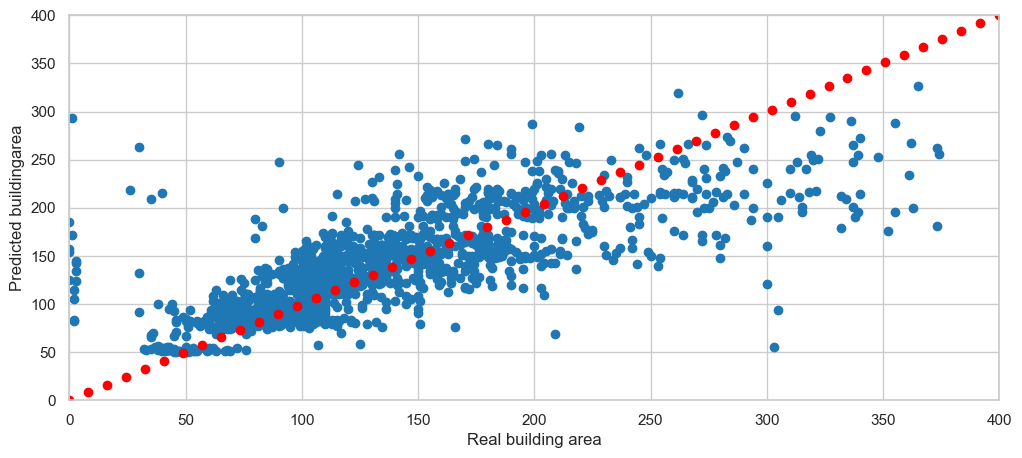

In [4]:
# It looks like BuildingArea affects price quite a lot, but there are many rows with NaN values for this parameter --> We will use a predictor for this parameter to input values to missing data
# according to the location of the house and the number of bathrooms and bedrooms it has
# Since this does not depend on price, we will train the predictor using al non-nan rows of both the train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

predictor_set = pd.concat([train_set.drop('Price', inplace=False, axis = 1), test_set])

building_train = predictor_set[predictor_set['BuildingArea'].isna() == False]

param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

bdata_train, bdata_val, blabel_train, blabel_val = \
    train_test_split(building_train[param_list], building_train['BuildingArea'], test_size=0.2, random_state=6)


n_neighbors = 50
knn = KNeighborsRegressor(n_neighbors)

knn.fit(bdata_train, blabel_train)

prediction = knn.predict(bdata_val)

print('mse with knn(', n_neighbors,'):', mean_squared_error(blabel_val, prediction), r2_score(blabel_val, prediction))

plt.scatter(blabel_val, prediction)
plt.scatter(np.linspace(0,400), np.linspace(0,400), color = 'red')
plt.xlim(0,400)
plt.ylim(0,400)

plt.xlabel('Real building area')
plt.ylabel('Predicted buildingarea')

plt.show()



# The linear model works pretty bad in this case, so we are gonna stick with the k neighbors model


# lr = LinearRegression()

# lr.fit(bdata_train, blabel_train)

# prediction = lr.predict(bdata_val)

# print('mse with lr:', mean_squared_error(blabel_val, prediction), r2_score(blabel_val, prediction))



In [5]:
# Now that we have seen that it is quite effective, specially compared to just imputing mean or median values, we can train a new iteration of the knn using all the data we have


predictor_set = pd.concat([train_set.drop('Price', inplace=False, axis = 1), test_set])

building_train = predictor_set[predictor_set['BuildingArea'].isna() == False]



param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

n_neighbors = 50
buildingarea_predictor = KNeighborsRegressor(n_neighbors)

buildingarea_predictor.fit(building_train[param_list], building_train['BuildingArea'])


KNeighborsRegressor(n_neighbors=50)

In [6]:
train_ba_na = train_set[train_set['BuildingArea'].isna()]
train_ba_not_na = train_set[train_set['BuildingArea'].isna() == False]


predictedna = buildingarea_predictor.predict(train_ba_na[param_list])

train_ba_na['BuildingArea'] = predictedna

train_set_ba_pred = pd.concat([train_ba_na, train_ba_not_na]).sort_index()


test_ba_na = test_set[test_set['BuildingArea'].isna()]
test_ba_not_na = test_set[test_set['BuildingArea'].isna() == False]


predictedna = buildingarea_predictor.predict(test_ba_na[param_list])

test_ba_na['BuildingArea'] = predictedna

test_set_ba_pred = pd.concat([test_ba_na, test_ba_not_na]).sort_index()


C:\Users\ptbad\AppData\Local\Temp\ipykernel_3540\1124346006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ba_na['BuildingArea'] = predictedna
C:\Users\ptbad\AppData\Local\Temp\ipykernel_3540\1124346006.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ba_na['BuildingArea'] = predictedna


In [7]:
train_set_ba_pred.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,199.4600,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,92.0730,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0000,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,137.7136,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0000,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [8]:
test_set_ba_pred.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,171.500,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.000,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.000,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.000,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,111.886,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


In [9]:
for column_name in predictor_set.columns:
    column = predictor_set[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)
    

Count of zeros in column  Suburb  is :  0
Count of zeros in column  Address  is :  0
Count of zeros in column  Rooms  is :  0
Count of zeros in column  Type  is :  0
Count of zeros in column  Method  is :  0
Count of zeros in column  SellerG  is :  0
Count of zeros in column  Date  is :  0
Count of zeros in column  Distance  is :  6
Count of zeros in column  Postcode  is :  0
Count of zeros in column  Bedroom2  is :  16
Count of zeros in column  Bathroom  is :  34
Count of zeros in column  Car  is :  1026
Count of zeros in column  Landsize  is :  1939
Count of zeros in column  BuildingArea  is :  17
Count of zeros in column  YearBuilt  is :  0
Count of zeros in column  CouncilArea  is :  0
Count of zeros in column  Lattitude  is :  0
Count of zeros in column  Longtitude  is :  0
Count of zeros in column  Regionname  is :  0
Count of zeros in column  Propertycount  is :  0


In [10]:
predictor_set.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

# Pipeline construction


In [30]:
class nan_knn_filler():

    def __init__(self, train_set, test_set, parameters, column, n_neighbors, zero2nan = False):
        
        self.train_set = train_set
        self.test_set = test_set
        self.parameters = parameters
        self.column = column
        self.zero2nan = zero2nan
        self.n = n_neighbors
        self.predictor = KNeighborsRegressor(self.n)

    def fit(self, X, y=None):
        return self
       
    
    def transform(self, X):
        df = pd.concat([(self.train_set).drop('Price', inplace=False, axis = 1), self.test_set])

        if self.zero2nan:
            df[self.column] = df[self.column].replace(0, np.nan)

        knn_training = df[df[self.column].isna() == False]
        self.predictor.fit(knn_training[self.parameters], knn_training[self.column])

        df_na = X[X[self.column].isna() == True]
        df_not_na = X[X[self.column].isna() == False]

        df_na[self.column] = self.predictor.predict(df_na[self.parameters])

        return pd.concat([df_na, df_not_na]).sort_index()        


In [50]:
param = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']

nan_filler = nan_knn_filler(train_set=train_set, test_set=test_set, parameters=param, column='BuildingArea', n_neighbors=50)

nan_filler.fit(X=train_set)

nan_filler.transform(X=train_set)

#    IT WORKS!!!

C:\Users\ptbad\AppData\Local\Temp\ipykernel_3540\1609961350.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na[self.column] = self.predictor.predict(df_na[self.parameters])


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,199.4600,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,92.0730,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0000,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,137.7136,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0000,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,NaN,131.9654,1930.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.0000,1890.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,113.4400,1993.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0


In [53]:
class nan_filler():

    def __init__(self, train_set, test_set, columns, strategy):

        self.train_set = train_set
        self.test_set = test_set
        self.params = columns
        self.strat = strategy

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

        df = pd.concat([(self.train_set).drop('Price', inplace=False, axis = 1), self.test_set])

        if self.strat == 'Mean':
            for column in self.params:
                X[column] = X[column].fillna(df.groupby('Suburb')[column].transform('mean'))
        elif self.strat == 'Median':
            for column in self.params:
                X[column] = X[column].fillna(df.groupby('Suburb')[column].transform('median'))
        

        else:
            assert self.strat in ['Mean', 'Median'], "Nan_filler parameter wrong, try with Mean or Median"

        return X


class zero2nan():

    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for column in self.columns:
            X[column] = X[column].replace(0, np.nan)
        return X
        
    


In [49]:
zero_nan = zero2nan(columns=['YearBuilt', 'Landsize'])

zero_nan.transform(X = train_set)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,NaN,NaN,1930.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.0,1890.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,NaN,1993.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder

param_list = ['Lattitude', 'Longtitude', 'Bedroom2', 'Bathroom', 'Distance']


pipeline1 = Pipeline([
    ('0_2_nan', zero2nan(columns=['Landsize'])),
    #('simple_nan_filler', nan_filler(train_set=train_set, test_set=test_set, columns=['Car', 'YearBuilt', 'Landsize'], strategy='Median')),
    ('nan_knn_filler_BuildingArea', nan_knn_filler(train_set = train_set, test_set = test_set, parameters = param_list, column = 'BuildingArea', n_neighbors = 50, zero2nan = True))
    # ('log',FunctionTransformer(np.log1p, validate=True)),
    # ('std_scaler', StandardScaler())
])



In [52]:
housing = pipeline1.fit_transform(train_set)

housing

C:\Users\ptbad\AppData\Local\Temp\ipykernel_3540\1609961350.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na[self.column] = self.predictor.predict(df_na[self.parameters])


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,203.8000,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,92.0730,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0000,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,137.7136,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0000,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,NaN,131.9654,1930.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.0000,1890.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,113.4400,1993.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0


Explain the choosed model and why you think that is is the best:
